In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Unsupervised ML (Clustering)

**Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.**

- As per my knowledge I have kept and deleted some of the columns in an excel sheet named 'district_data.xlsx. This will be used to make clustering machine learning model and to provide us with 3 clusters namely sensitives areas, moderate areas and peaceful as per crime in those districts.
- There is no point in adding literacy rate,population figures and area of state as this analysis is district wise and not state-wise. The data figures which I have is of different states. For ex. I dont have population figure for each district in Goa but I have total population figure for Goa which is not useful in this case.

In [2]:
data=pd.read_excel('district_data.xlsx')
data.head()

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,198,199,78,16,104,30,1131,16,175,181,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,191,366,168,11,65,69,1543,7,154,270,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,237,723,156,33,209,38,2088,14,186,404,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,98,173,164,12,37,23,795,17,57,233,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,437,1021,70,50,220,41,1244,12,247,431,6507


In [3]:
#checking for any null values in dataset
data.isna().sum()

STATE_UT                               0
DISTRICT                               0
YEAR                                   0
MURDER                                 0
ATTEMPT TO MURDER                      0
RAPE                                   0
KIDNAPPING & ABDUCTION                 0
DACOITY                                0
ROBBERY                                0
BURGLARY                               0
THEFT                                  0
RIOTS                                  0
CRIMINAL BREACH OF TRUST               0
CHEATING                               0
ARSON                                  0
HURT/GREVIOUS HURT                     0
DOWRY DEATHS                           0
CRUELTY BY HUSBAND OR HIS RELATIVES    0
CAUSING DEATH BY NEGLIGENCE            0
TOTAL IPC CRIMES                       0
dtype: int64

In [4]:
#checking for any duplicates in dataset

data.duplicated().sum()

0

In [5]:
#importing library for KMeans clustering model

from sklearn.cluster import KMeans

In [6]:
#printing columns from dataframe 
data.columns

Index(['STATE_UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON',
       'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE',
       'TOTAL IPC CRIMES'],
      dtype='object')

In [7]:
#selecting columns that are required for analysis and to be used in clustering model

x=data[['MURDER', 'ATTEMPT TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON',
       'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE','TOTAL IPC CRIMES']]

In [8]:
#simce we want three clusters hence taking 3 clusters and taking random state as 31
kmeans=KMeans(n_clusters=3,random_state=31)

#applying clustering model on selected column and saving result in y and printing it
y=kmeans.fit_predict(x)
print(y)

[1 1 1 ... 0 0 1]


In [9]:
#importing silhoutte score library
from sklearn.metrics import silhouette_score

In [10]:
# printing silhoutter score for model

silhouette_score(x,y)

0.5928309801973402

In [11]:
# saving 0th cluster in df1 dataframe
df1=data[y==0]
df1

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,98,173,164,12,37,23,795,17,57,233,3140
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,5,2,0,162,1,0,0,0,1,0,0,4,287
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,0,10,2,296,1,2,4,0,17,1,0,6,439
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,10,8,12,1,4,118,231,70,18,53,34,679,6,108,167,2572
22,ANDHRA PRADESH,VIJAYAWADA RLY.,2001,2,1,1,0,0,1,0,265,1,2,3,0,9,0,0,2,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,DELHI UT,NEW DELHI,2012,9,6,5,28,0,9,25,374,12,14,132,1,16,0,4,67,1057
8585,DELHI UT,NORTH,2012,25,17,14,153,0,45,97,1025,5,37,127,3,92,6,70,13,2700
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,6
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,3,7,10,0,0,3,3,0,1,0,60


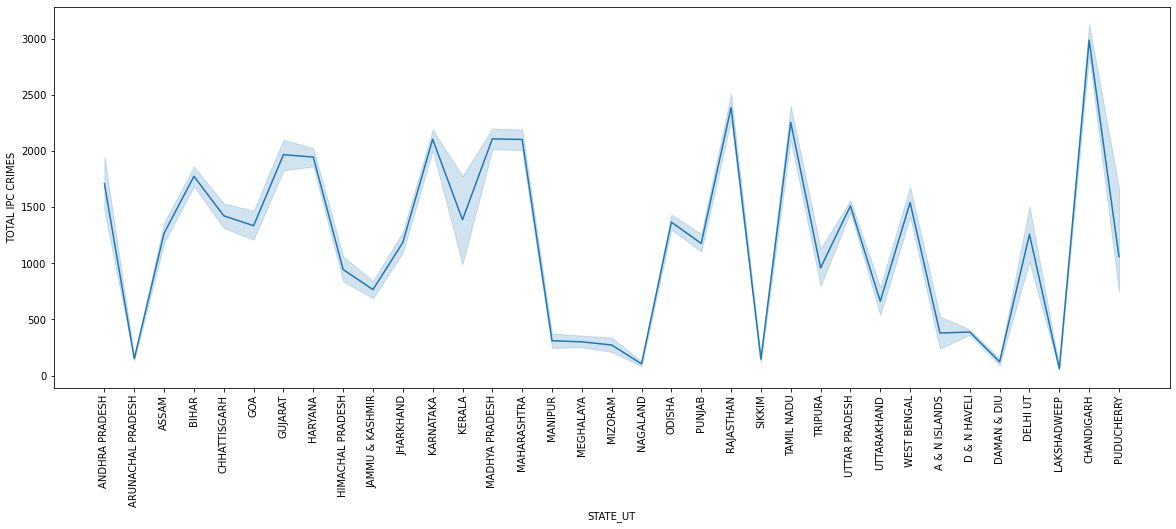

In [12]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df1['STATE_UT'],y=df1['TOTAL IPC CRIMES'])
plt.xticks(rotation=90)
plt.show()   


In [13]:

df1['TOTAL IPC CRIMES'].mean()

1402.6952958531388

In [14]:
# saving  cluster 2 in df2 dataframe
df2=data[y==1] 
df2

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,198,199,78,16,104,30,1131,16,175,181,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,191,366,168,11,65,69,1543,7,154,270,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,237,723,156,33,209,38,2088,14,186,404,5818
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,437,1021,70,50,220,41,1244,12,247,431,6507
6,ANDHRA PRADESH,GUNTUR,2001,182,88,54,82,16,59,338,1122,244,67,300,43,1792,7,378,369,7848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,DELHI UT,SOUTH,2012,39,19,70,245,2,52,235,2126,3,33,256,4,101,17,68,25,5045
8590,DELHI UT,SOUTH-EAST,2012,46,69,116,538,2,72,201,2892,12,45,207,11,252,11,123,218,7040
8591,DELHI UT,SOUTH-WEST,2012,47,48,87,399,0,47,211,1171,6,27,189,6,131,18,207,4,4085
8593,DELHI UT,WEST,2012,52,37,79,454,2,52,186,2352,5,36,202,18,227,18,327,292,5558


In [15]:

df2['TOTAL IPC CRIMES'].mean()

5434.186995325117

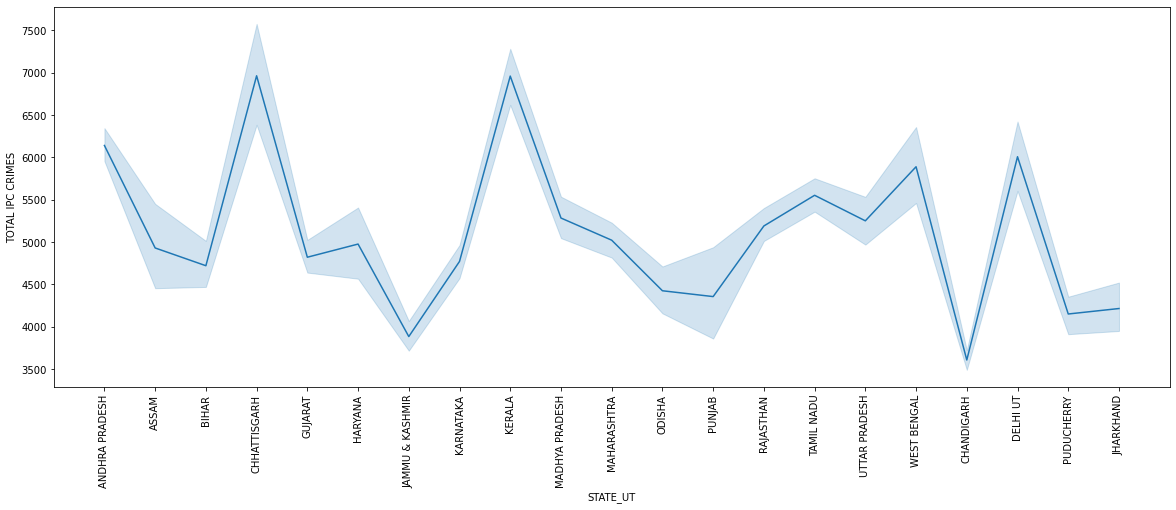

In [16]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df2['STATE_UT'],y=df2['TOTAL IPC CRIMES'])
plt.xticks(rotation=90)
plt.show() 

In [17]:
# saving  cluster 2 in df3 dataframe
df3=data[y==2]
df3

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,37,80,13,67,1155,2792,65,101,1293,0,3137,24,746,409,11831
133,GUJARAT,AHMEDABAD COMMR.,2001,90,58,39,143,18,192,695,3588,191,140,205,2,1311,7,530,0,13496
244,KARNATAKA,BANGALORE COMMR.,2001,221,327,40,152,31,284,2108,6293,298,258,1708,3,3735,40,229,38,27254
276,KERALA,ERNAKULAM,2001,44,67,38,20,25,80,592,1264,626,22,267,25,1756,3,161,0,14843
294,MADHYA PRADESH,BHOPAL,2001,61,109,106,55,8,99,852,1351,77,33,192,8,652,15,132,272,13708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,RAJASTHAN,ALWAR,2012,100,88,129,243,8,63,231,3220,8,23,1213,22,2612,47,655,503,11941
8405,TAMIL NADU,CHENNAI,2012,180,219,94,87,2,85,546,2169,95,50,769,10,1412,12,237,1411,19881
8542,WEST BENGAL,24 PARGANAS SOUTH,2012,224,8,244,419,34,35,51,1279,1976,4,250,15,234,45,1666,70,14370
8559,WEST BENGAL,KOLKATA,2012,85,154,68,271,8,44,96,4960,397,428,2100,0,3518,19,865,507,25370


In [18]:
df3['TOTAL IPC CRIMES'].mean()

18155.020979020977

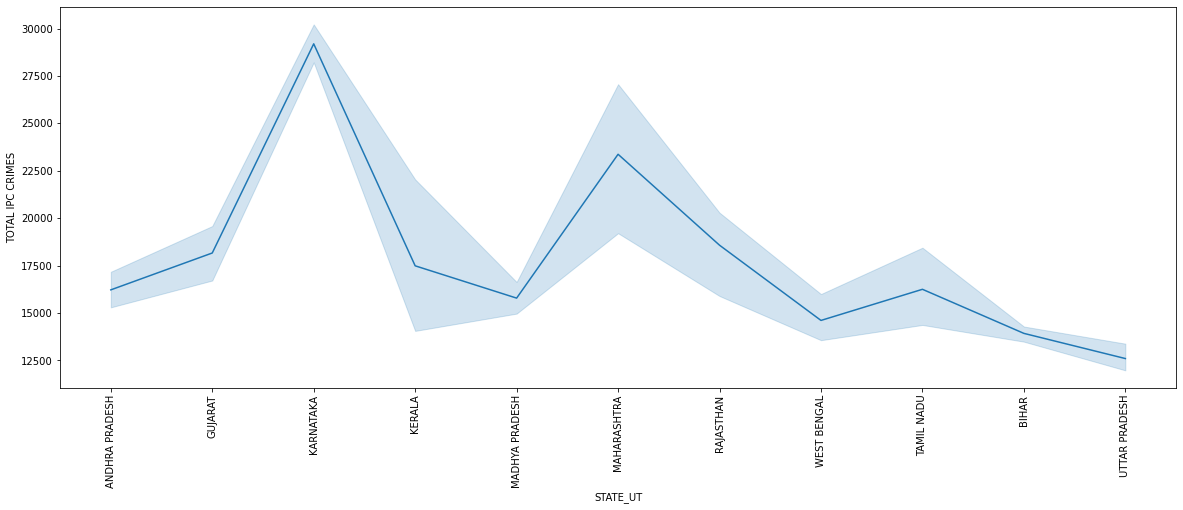

In [19]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df3['STATE_UT'],y=df3['TOTAL IPC CRIMES'])
plt.xticks(rotation=90)
plt.show() 

**Observations**

**Note:I have plotted 3 line plots of state vs total crimes as per the clusters formed which suggests that districts from those particular states wih their respective crime rates will be plotted.**
- Hence it can be seen from the plots that cluster with y=0 or df1 contains districts that are peaceful as its total crimes are lower compared to other 2 clusters. Hence this areas can be considered as **peaceful areas**. The mean value for total crimes is 1402 in peaceful area.It can be seen from plot that Arunachal Pradesh and Lakshwadeep has lowest total crimes while Chandigarh has highest total crimes.
- The cluster with y=1 or df2 contains districts that have moderate crimes with a mean value of 5434 total crimes in that area. This areas can be considered as **moderate areas**.It can be seen from plot that Jammu&Kashmir and Chandigarh has lowest total crimes while Chattisgarh and Kerala has highest total crimes
- The cluster with y=2 or df3 contains districts that have highest crimes reported with a mean value of 18155 total crimes in that area.This areas can be considered as **sensitive areas**.It can be seen from plot that Uttar Pradesh  has lowest total crimes while Karnataka has highest total crimes


# 4.2  Create DataFrame for each cluster that shows data according to the areas.

**Dataframes are already created as per each cluster in above question. But here I will just rename them and print dataframe.**

In [20]:
#districts and crime data for peaceful areas
p_area=df1
p_area

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,98,173,164,12,37,23,795,17,57,233,3140
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,5,2,0,162,1,0,0,0,1,0,0,4,287
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,0,10,2,296,1,2,4,0,17,1,0,6,439
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,10,8,12,1,4,118,231,70,18,53,34,679,6,108,167,2572
22,ANDHRA PRADESH,VIJAYAWADA RLY.,2001,2,1,1,0,0,1,0,265,1,2,3,0,9,0,0,2,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,DELHI UT,NEW DELHI,2012,9,6,5,28,0,9,25,374,12,14,132,1,16,0,4,67,1057
8585,DELHI UT,NORTH,2012,25,17,14,153,0,45,97,1025,5,37,127,3,92,6,70,13,2700
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,6
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,3,7,10,0,0,3,3,0,1,0,60


- According to me 6101 districts can be considered as peaceful areas

In [21]:
#districts and crime data for moderate areas

m_area=df2
m_area

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,198,199,78,16,104,30,1131,16,175,181,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,191,366,168,11,65,69,1543,7,154,270,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,237,723,156,33,209,38,2088,14,186,404,5818
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,437,1021,70,50,220,41,1244,12,247,431,6507
6,ANDHRA PRADESH,GUNTUR,2001,182,88,54,82,16,59,338,1122,244,67,300,43,1792,7,378,369,7848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,DELHI UT,SOUTH,2012,39,19,70,245,2,52,235,2126,3,33,256,4,101,17,68,25,5045
8590,DELHI UT,SOUTH-EAST,2012,46,69,116,538,2,72,201,2892,12,45,207,11,252,11,123,218,7040
8591,DELHI UT,SOUTH-WEST,2012,47,48,87,399,0,47,211,1171,6,27,189,6,131,18,207,4,4085
8593,DELHI UT,WEST,2012,52,37,79,454,2,52,186,2352,5,36,202,18,227,18,327,292,5558


- According to me 2353 districts can be considered as areas with moderate crimes.

In [22]:
#districts and crime data for moderate areas
s_area=df3
s_area

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,37,80,13,67,1155,2792,65,101,1293,0,3137,24,746,409,11831
133,GUJARAT,AHMEDABAD COMMR.,2001,90,58,39,143,18,192,695,3588,191,140,205,2,1311,7,530,0,13496
244,KARNATAKA,BANGALORE COMMR.,2001,221,327,40,152,31,284,2108,6293,298,258,1708,3,3735,40,229,38,27254
276,KERALA,ERNAKULAM,2001,44,67,38,20,25,80,592,1264,626,22,267,25,1756,3,161,0,14843
294,MADHYA PRADESH,BHOPAL,2001,61,109,106,55,8,99,852,1351,77,33,192,8,652,15,132,272,13708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,RAJASTHAN,ALWAR,2012,100,88,129,243,8,63,231,3220,8,23,1213,22,2612,47,655,503,11941
8405,TAMIL NADU,CHENNAI,2012,180,219,94,87,2,85,546,2169,95,50,769,10,1412,12,237,1411,19881
8542,WEST BENGAL,24 PARGANAS SOUTH,2012,224,8,244,419,34,35,51,1279,1976,4,250,15,234,45,1666,70,14370
8559,WEST BENGAL,KOLKATA,2012,85,154,68,271,8,44,96,4960,397,428,2100,0,3518,19,865,507,25370


- According to me 143 districts can be considered as sensitive areas with high crime rate.

# 4.3  "Analyse your clusters and prepare a report that explains all your observations.

In [23]:
p_area

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,98,173,164,12,37,23,795,17,57,233,3140
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,5,2,0,162,1,0,0,0,1,0,0,4,287
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,0,10,2,296,1,2,4,0,17,1,0,6,439
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,10,8,12,1,4,118,231,70,18,53,34,679,6,108,167,2572
22,ANDHRA PRADESH,VIJAYAWADA RLY.,2001,2,1,1,0,0,1,0,265,1,2,3,0,9,0,0,2,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,DELHI UT,NEW DELHI,2012,9,6,5,28,0,9,25,374,12,14,132,1,16,0,4,67,1057
8585,DELHI UT,NORTH,2012,25,17,14,153,0,45,97,1025,5,37,127,3,92,6,70,13,2700
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,6
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,3,7,10,0,0,3,3,0,1,0,60


In [24]:
p_area.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
count,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000
mean,2006.506638,34.661367,28.527782,19.637928,26.220292,5.487461,16.566628,67.182101,186.144730,53.610556,12.944435,40.045075,8.187346,186.523357,7.851008,46.831175,64.745124,1402.695296
std,3.451514,30.736011,34.441689,20.514742,29.020467,9.236530,19.268807,62.503666,201.073841,71.198532,16.089525,55.443450,10.990599,231.724228,11.078154,62.006711,77.722920,984.358893
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,12.000000,6.000000,5.000000,6.000000,0.000000,4.000000,18.000000,58.000000,5.000000,2.000000,7.000000,1.000000,20.000000,0.000000,3.000000,2.000000,541.000000
50%,2006.000000,28.000000,19.000000,14.000000,16.000000,2.000000,11.000000,52.000000,132.000000,28.000000,7.000000,22.000000,5.000000,109.000000,3.000000,24.000000,37.000000,1260.000000
75%,2010.000000,48.000000,38.000000,28.000000,37.000000,7.000000,23.000000,98.000000,241.000000,72.000000,18.000000,50.000000,12.000000,265.000000,11.000000,65.000000,102.000000,2203.000000
max,2012.000000,287.000000,627.000000,219.000000,241.000000,112.000000,423.000000,486.000000,2134.000000,759.000000,134.000000,765.000000,374.000000,1682.000000,139.000000,582.000000,576.000000,3496.000000


In [25]:
#saving crime columns in a list
features=['MURDER', 'ATTEMPT TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON',
       'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE']

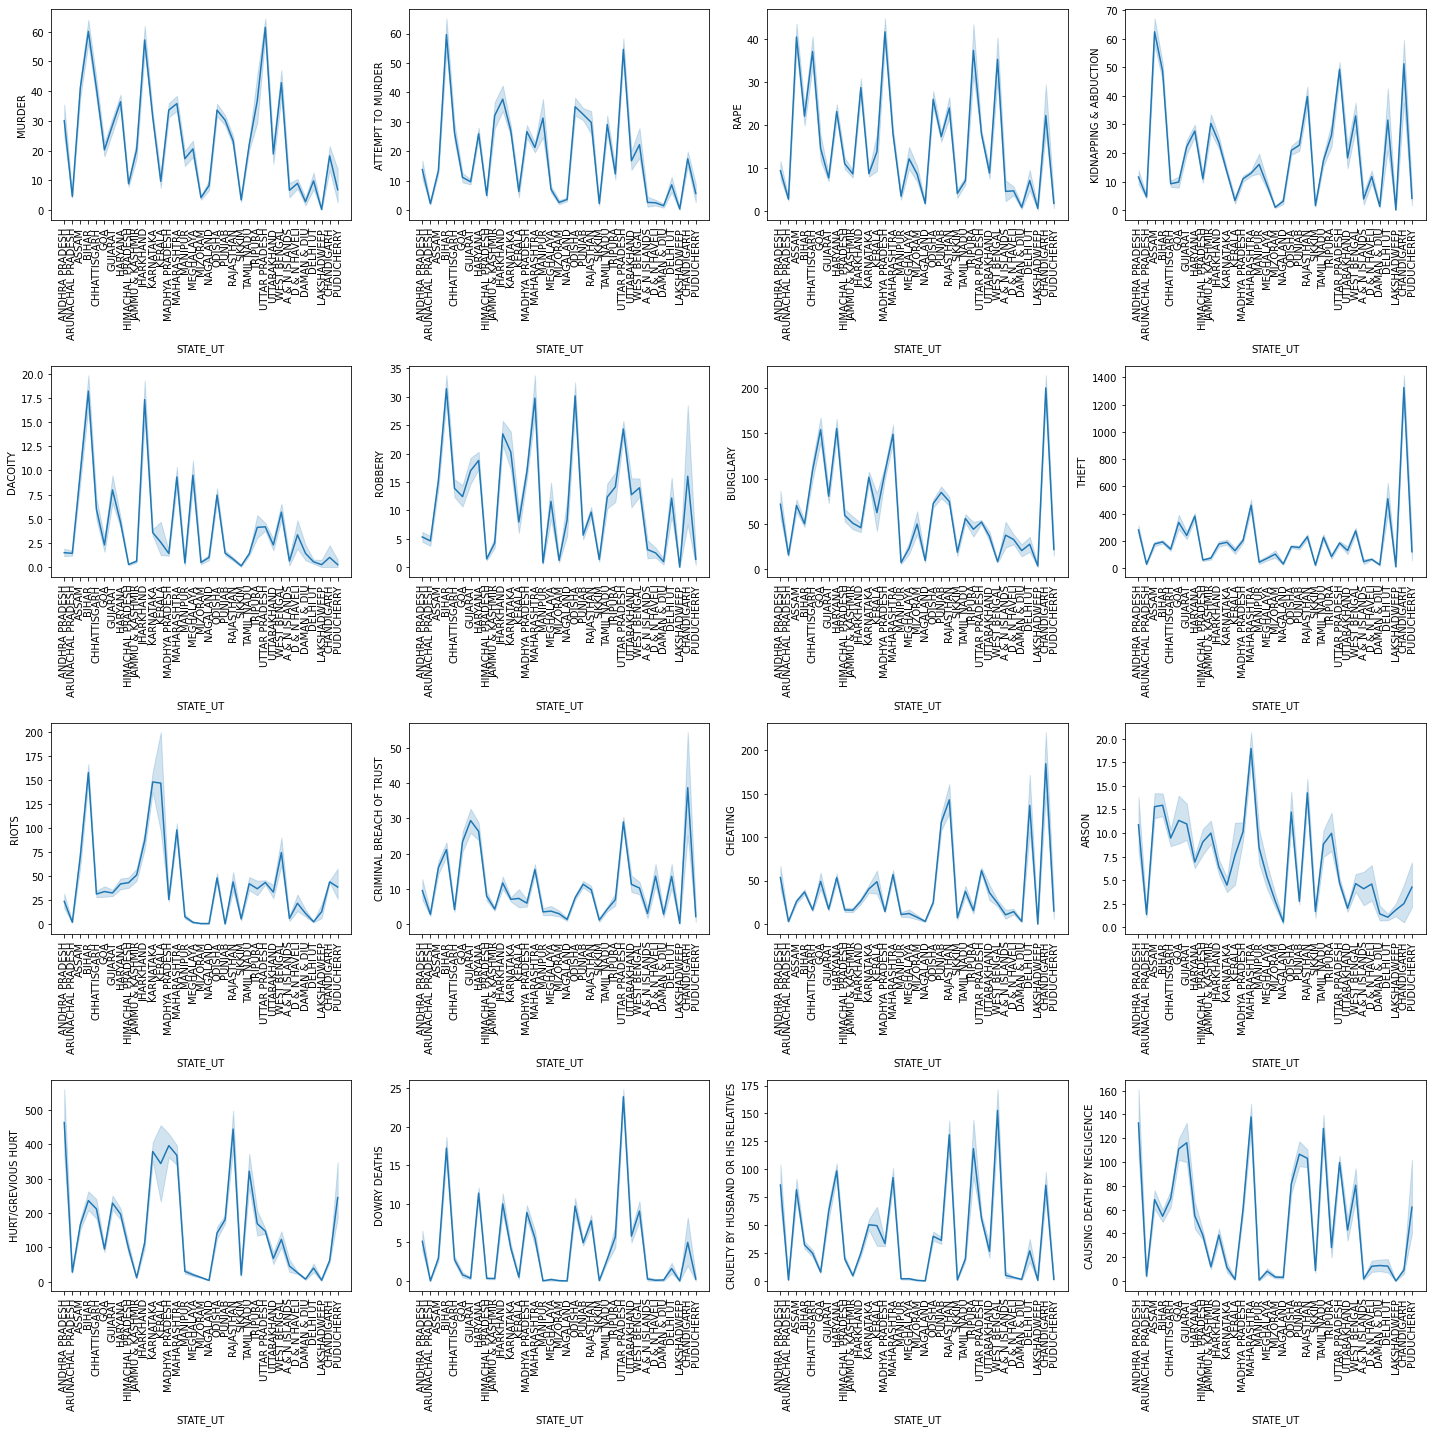

In [96]:
#plotting state vs crimes 

plt.figure(figsize=(20,20))
plotnumber=1
for column in features:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.lineplot(x='STATE_UT',y=column,data=p_area)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

In [93]:
# printing  total minimum  crimes districts in sensitive areas
min_crimes=p_area.sort_values(by='TOTAL IPC CRIMES').head(10)
min_crimes

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
675,DELHI UT,S.T.F.,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1358,DELHI UT,S.T.F.,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1554,HIMACHAL PRADESH,G.R.P.,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6005,MANIPUR,CID,2009,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8261,MANIPUR,CID,2012,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
5275,MANIPUR,CID,2008,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2
6745,MANIPUR,CID,2010,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
7495,MANIPUR,CID,2011,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
7272,HIMACHAL PRADESH,CID,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8070,JAMMU & KASHMIR,RAILWAYS KATRA,2012,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2


In [94]:
max_crimes=p_area.sort_values(by='TOTAL IPC CRIMES').tail(10)
max_crimes

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
6277,WEST BENGAL,COOCHBEHAR,2009,52,140,139,151,8,9,4,329,126,34,53,4,120,13,508,114,3465
540,TAMIL NADU,THIRUVALLUR,2001,34,56,16,24,2,11,106,226,201,5,28,28,329,6,16,196,3468
8190,MADHYA PRADESH,MANDSAUR,2012,37,49,49,34,2,20,147,300,25,69,42,13,104,6,78,147,3469
1707,MADHYA PRADESH,SHIVPURI,2003,60,66,69,47,0,21,191,210,109,15,16,12,400,13,32,99,3473
1862,RAJASTHAN,DAUSA,2003,33,17,17,40,2,5,82,411,82,20,116,17,76,3,61,161,3482
4684,RAJASTHAN,SAWAI MADHOPUR,2007,19,21,21,48,0,12,81,452,16,2,224,16,9,13,131,68,3485
3976,RAJASTHAN,SAWAI MADHOPUR,2006,24,24,20,47,0,19,104,469,5,2,190,10,44,7,136,76,3487
6913,TAMIL NADU,THIRUVALLUR,2010,43,51,18,17,2,6,74,143,68,3,53,2,360,6,19,336,3487
8549,WEST BENGAL,COOCHBEHAR,2012,48,94,92,179,3,9,12,284,69,23,86,26,163,25,539,119,3491
7672,TAMIL NADU,TRICHY URBAN,2011,27,21,6,28,0,30,55,437,10,0,57,2,142,2,28,174,3496


In [99]:
m_area.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
count,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000,2353.000000
mean,2006.922227,72.422014,66.848704,44.714832,73.159796,9.723332,49.363791,241.466638,746.135572,167.665108,35.506587,169.012750,25.763706,826.663833,16.538037,208.377816,231.764131,5434.186995
std,3.474321,47.216519,61.277424,34.111024,74.245777,12.491917,52.849101,172.829191,614.840538,173.831028,39.804583,171.545171,53.035176,658.233344,17.463675,194.053432,199.864818,1805.074525
min,2001.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3278.000000
25%,2004.000000,41.000000,31.000000,21.000000,27.000000,2.000000,20.000000,136.000000,354.000000,55.000000,11.000000,50.000000,10.000000,349.000000,4.000000,79.000000,91.000000,4061.000000
50%,2007.000000,61.000000,51.000000,37.000000,49.000000,6.000000,36.000000,208.000000,533.000000,112.000000,23.000000,115.000000,20.000000,666.000000,11.000000,159.000000,198.000000,4868.000000
75%,2010.000000,92.000000,82.000000,59.000000,90.000000,12.000000,61.000000,293.000000,897.000000,228.000000,45.000000,224.000000,34.000000,1125.000000,22.000000,272.000000,331.000000,6365.000000
max,2012.000000,542.000000,741.000000,369.000000,577.000000,127.000000,757.000000,1388.000000,4220.000000,2818.000000,411.000000,1480.000000,2350.000000,4728.000000,168.000000,1946.000000,2058.000000,12355.000000


In [101]:
#saving crime columns in a list
features=['MURDER', 'ATTEMPT TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON',
       'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE']

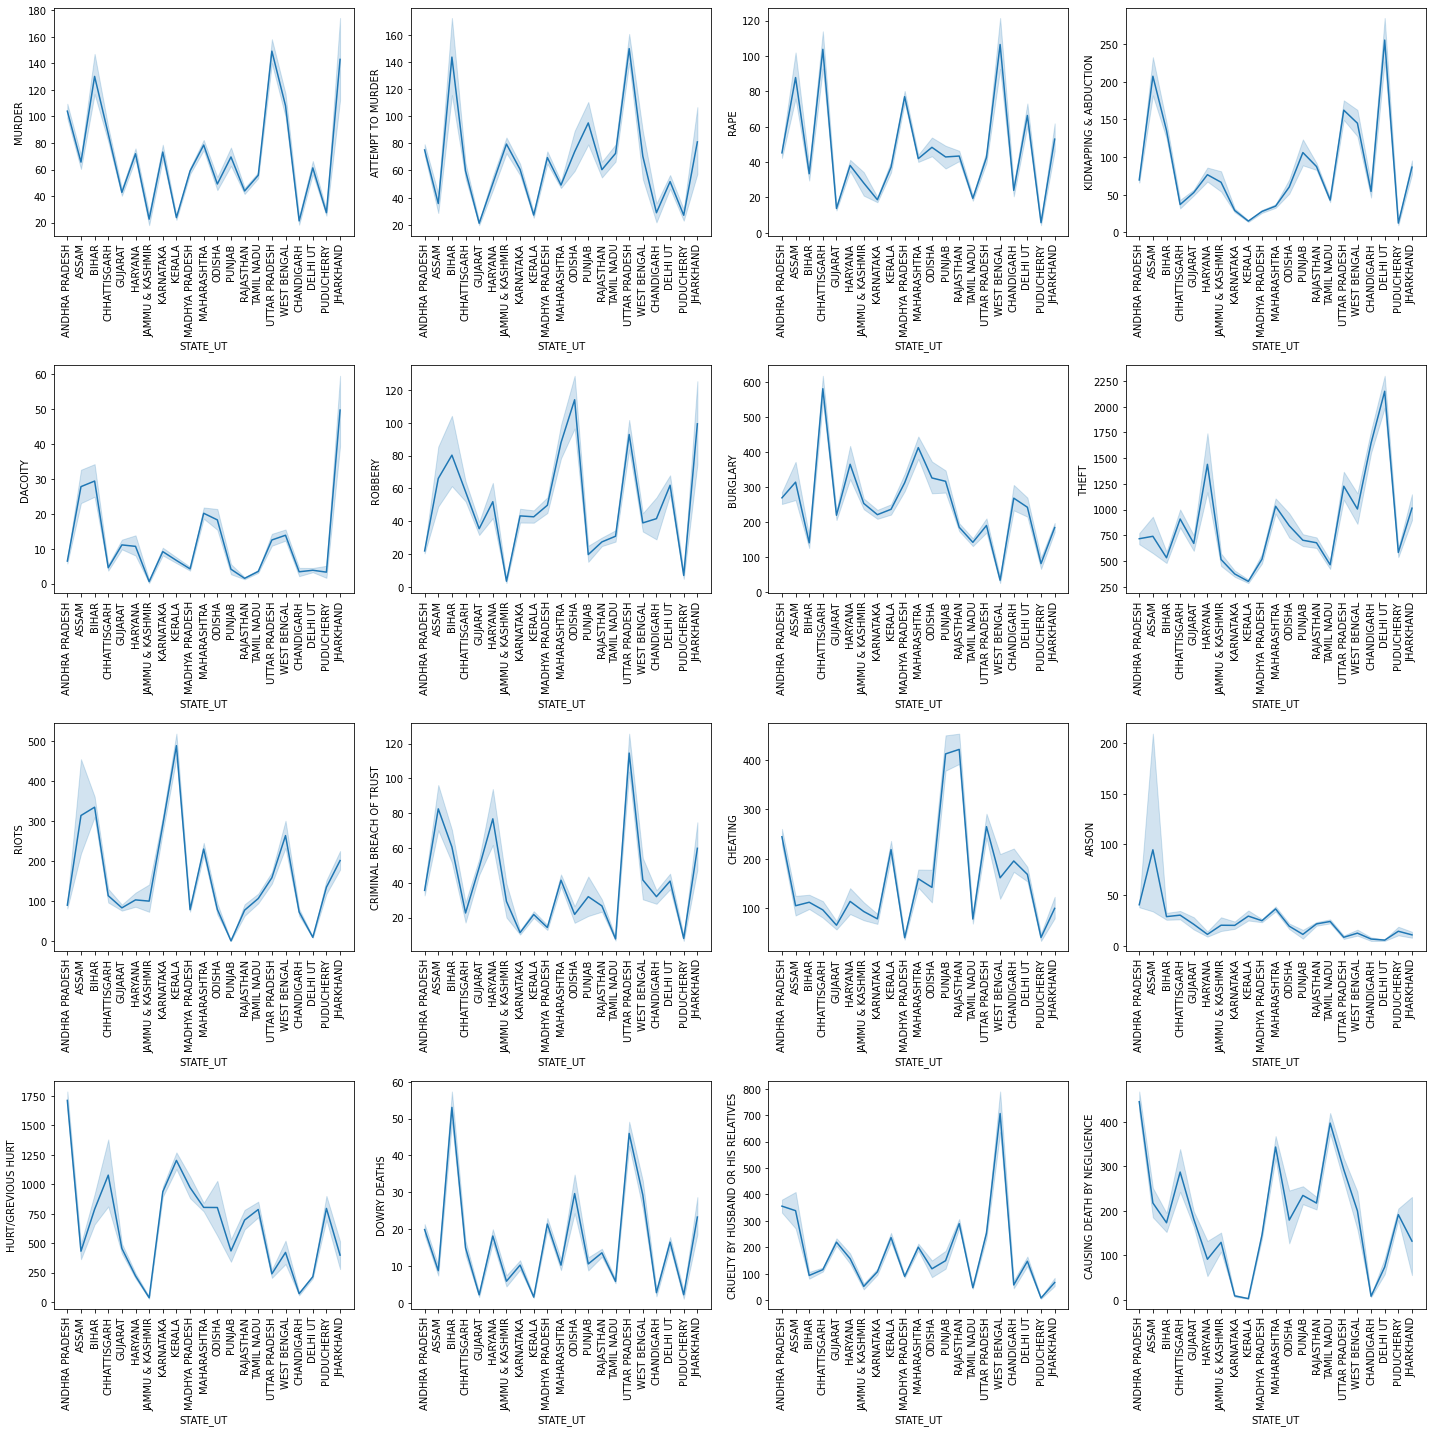

In [102]:
#plotting state vs crimes 

plt.figure(figsize=(20,20))
plotnumber=1
for column in features:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.lineplot(x='STATE_UT',y=column,data=m_area)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

In [103]:
# printing  total minimum crimes districts in moderate areas

min_mcrimes=m_area.sort_values(by='TOTAL IPC CRIMES').head(10)
min_mcrimes

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
1955,UTTAR PRADESH,G.R.P.,2003,19,12,3,3,13,48,1,2487,8,21,40,0,5,0,0,1,3278
6779,ODISHA,BALASORE,2010,53,40,48,75,13,46,166,321,40,35,96,28,1363,40,211,5,3330
8203,MADHYA PRADESH,SHAJAPUR,2012,39,44,67,18,4,18,133,323,42,14,29,22,1408,7,42,149,3350
2606,TAMIL NADU,THENI,2004,31,62,5,10,0,8,79,287,93,1,56,10,1107,1,27,142,3367
8192,MADHYA PRADESH,NARSINGHPUR,2012,46,47,71,16,0,16,157,159,20,7,38,16,1451,16,79,138,3371
4663,RAJASTHAN,DHOLPUR,2007,44,68,20,57,5,12,43,403,29,16,115,14,1422,13,164,112,3371
7041,CHANDIGARH,CHANDIGARH,2010,21,30,31,38,5,67,236,1481,65,23,163,9,65,5,41,6,3373
3123,MAHARASHTRA,LATUR,2005,49,40,24,22,11,36,220,401,175,18,55,35,962,40,107,152,3379
4939,BIHAR,AURANGABAD,2008,92,27,30,56,28,24,115,307,445,19,165,25,1487,32,65,151,3381
2424,MAHARASHTRA,LATUR,2004,61,31,22,19,7,31,224,366,188,21,50,30,1077,39,82,162,3382


In [104]:
# printing  total maximum crimes districts in moderate areas

max_mcrimes=m_area.sort_values(by='TOTAL IPC CRIMES').tail(10)
max_mcrimes

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
6640,KERALA,THRISSUR,2010,30,37,49,16,6,43,145,296,791,13,298,34,931,1,400,9,11420
7390,KERALA,THRISSUR RURAL,2011,24,41,69,12,3,34,180,251,597,13,479,27,942,1,449,11,11486
8541,WEST BENGAL,24 PARGANAS NORTH,2012,140,108,118,497,34,61,6,1453,680,94,141,19,79,74,1860,10,11765
5412,TAMIL NADU,CHENNAI,2008,100,130,35,43,5,41,322,1545,55,5,293,0,726,25,165,613,11829
2857,BIHAR,PATNA,2005,436,87,57,275,127,633,521,1356,484,47,199,46,392,85,189,452,11840
6632,KERALA,KOLLAM,2010,40,30,55,36,6,37,271,400,894,25,207,23,2142,4,581,4,11879
8562,WEST BENGAL,NADIA,2012,146,357,174,433,29,34,21,1251,128,132,338,22,2632,46,1860,285,11919
6628,KERALA,ERNAKULAM RURAL,2010,25,17,42,14,3,56,130,301,323,10,168,13,886,1,203,0,12225
5888,KERALA,ERNAKULAM RURAL,2009,34,17,26,11,6,54,333,509,307,16,136,10,1093,0,161,3,12350
8148,KERALA,KOTTAYAM,2012,20,29,55,19,2,26,188,265,483,35,299,17,2090,1,255,3,12355


In [110]:
s_area.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,2007.405594,144.510490,144.293706,98.685315,173.020979,21.335664,217.069930,974.055944,4260.167832,372.958042,150.349650,878.286713,21.895105,2019.279720,30.692308,693.503497,430.160839,18155.020979
std,3.470677,79.559958,115.231783,88.186056,136.810884,23.985014,213.827252,745.500331,3124.488310,436.228860,148.226286,770.065240,21.245286,1364.228753,23.329915,709.537886,331.684001,6157.725099
min,2001.000000,4.000000,2.000000,12.000000,6.000000,0.000000,18.000000,4.000000,202.000000,8.000000,4.000000,93.000000,0.000000,34.000000,0.000000,90.000000,0.000000,11484.000000
25%,2005.000000,86.000000,82.000000,46.000000,64.500000,6.000000,67.500000,556.000000,2325.500000,129.000000,32.500000,208.500000,5.500000,1023.500000,11.500000,236.000000,172.000000,13711.500000
50%,2008.000000,123.000000,116.000000,74.000000,143.000000,14.000000,121.000000,908.000000,3358.000000,244.000000,96.000000,591.000000,15.000000,1495.000000,28.000000,393.000000,421.000000,15718.000000
75%,2010.000000,213.500000,163.000000,105.000000,220.000000,31.000000,297.000000,1218.500000,5056.500000,471.000000,225.000000,1483.500000,37.000000,3403.000000,44.500000,882.500000,576.000000,20206.000000
max,2012.000000,356.000000,637.000000,568.000000,587.000000,219.000000,1131.000000,3175.000000,13195.000000,3181.000000,589.000000,3155.000000,101.000000,4837.000000,112.000000,3035.000000,1431.000000,34638.000000


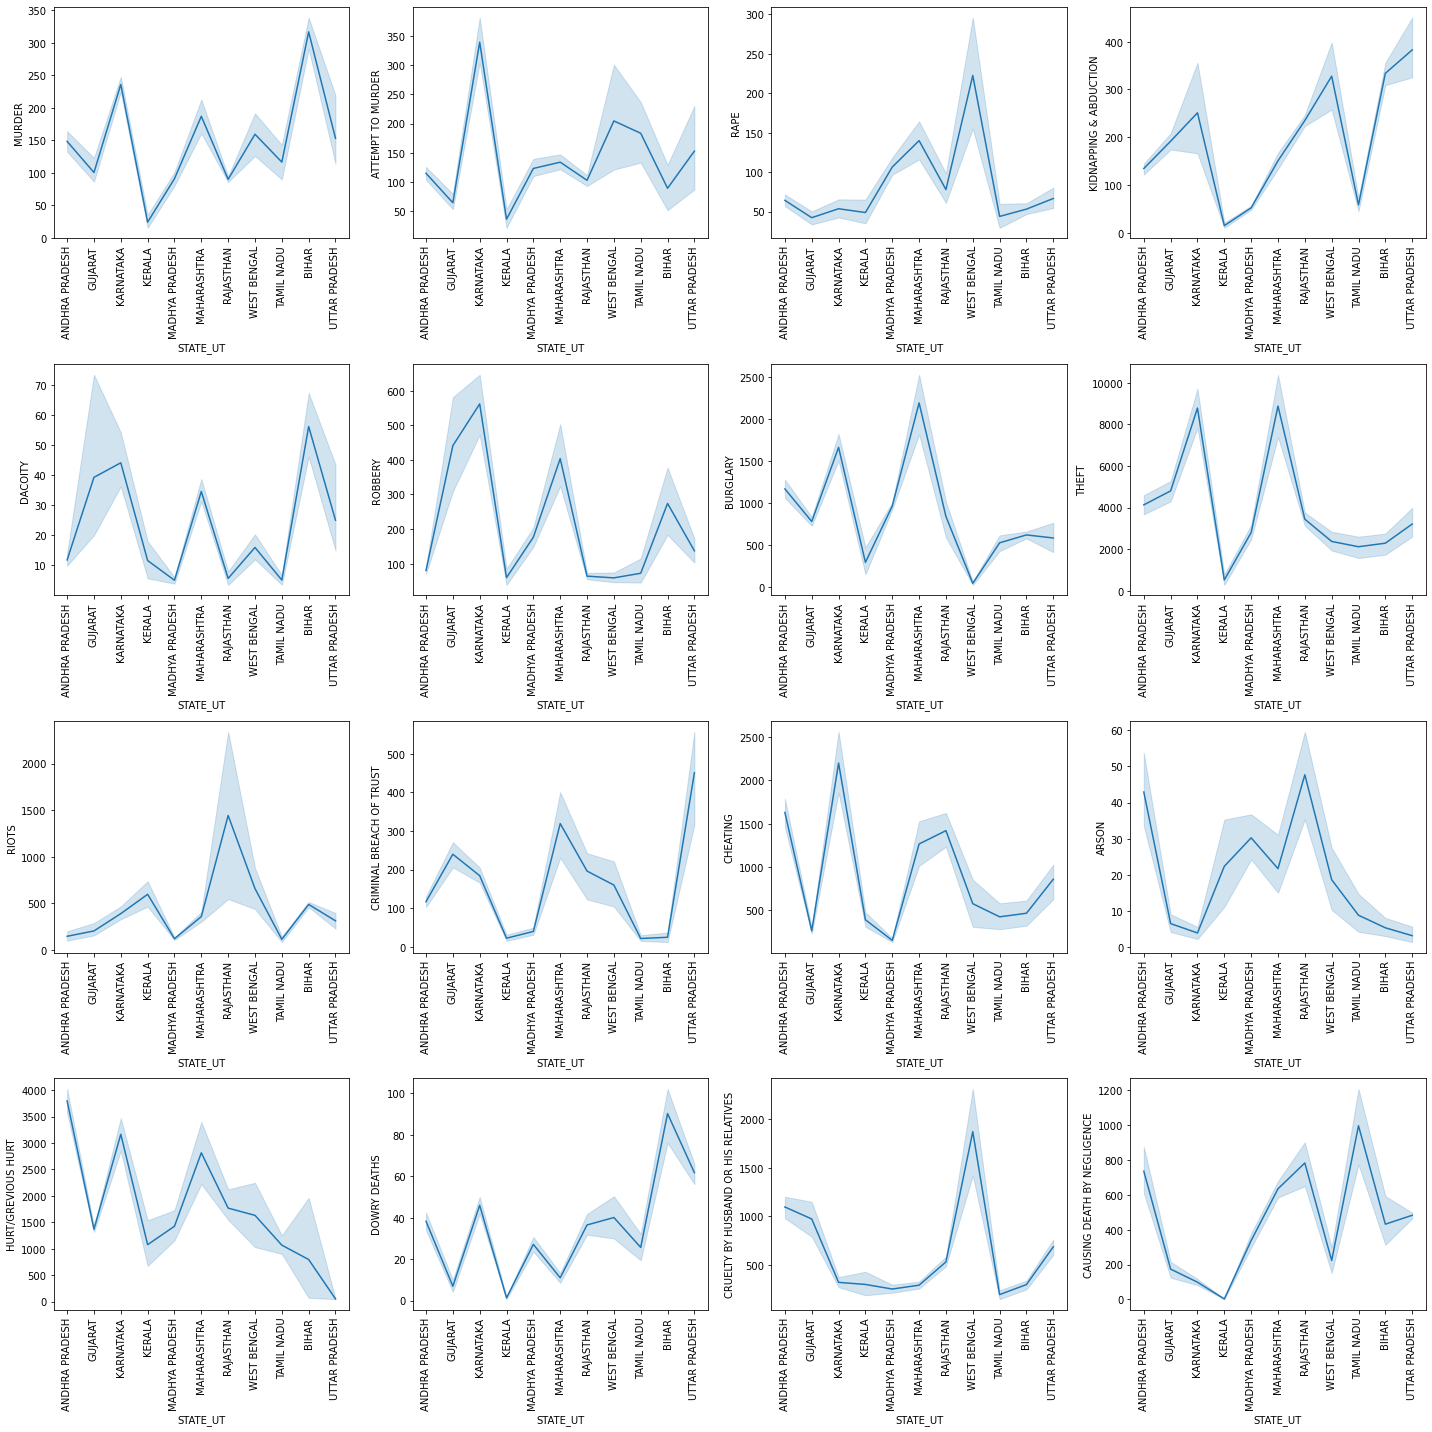

In [111]:
#plotting state vs crimes 

plt.figure(figsize=(20,20))
plotnumber=1
for column in features:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.lineplot(x='STATE_UT',y=column,data=s_area)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

In [114]:
# printing total minimum crimes districts in sensitive areas

min_scrimes=s_area.sort_values(by='TOTAL IPC CRIMES').head(10)
min_scrimes

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
3835,MAHARASHTRA,PUNE COMMR.,2006,104,99,77,108,31,219,1047,4068,497,81,533,13,1236,6,236,454,11484
3136,MAHARASHTRA,PUNE COMMR.,2005,106,85,79,102,27,190,1201,4322,474,72,609,16,1258,1,201,407,11817
6214,UTTAR PRADESH,GHAZIABAD,2009,254,277,53,491,53,195,394,4377,349,256,535,7,53,66,556,456,11821
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,37,80,13,67,1155,2792,65,101,1293,0,3137,24,746,409,11831
8359,RAJASTHAN,ALWAR,2012,100,88,129,243,8,63,231,3220,8,23,1213,22,2612,47,655,503,11941
652,WEST BENGAL,KOLKATA,2001,65,152,19,121,26,149,148,4040,275,271,863,0,1346,6,207,445,11970
2756,ANDHRA PRADESH,CYBERABAD,2005,150,88,44,151,26,95,1139,2287,44,83,950,37,3033,34,701,898,12079
7788,WEST BENGAL,NADIA,2011,136,375,185,500,25,43,20,1373,207,99,291,13,2668,65,1923,156,12271
8243,MAHARASHTRA,PUNE COMMR.,2012,110,124,85,109,35,731,1019,4181,532,92,756,48,1071,9,215,523,12308
6287,WEST BENGAL,MURSHIDABAD,2009,184,607,568,408,22,73,11,857,745,39,220,49,2994,51,3035,269,12308


In [115]:
# printing  total maximum crimes districts in sensitive areas

max_scrimes=s_area.sort_values(by='TOTAL IPC CRIMES').tail(10)
max_scrimes

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
8231,MAHARASHTRA,MUMBAI COMMR.,2012,215,170,232,212,29,1131,2500,10851,374,564,1827,86,3939,11,388,621,30508
3823,MAHARASHTRA,MUMBAI COMMR.,2006,239,135,165,190,29,292,3111,11685,278,510,1701,15,3797,17,327,778,31070
5975,MAHARASHTRA,MUMBAI COMMR.,2009,217,160,182,149,39,316,2769,12009,305,511,2132,14,3892,15,434,710,31262
3124,MAHARASHTRA,MUMBAI,2005,212,136,201,198,47,362,3175,11903,261,536,1664,10,3731,9,336,658,31432
6593,KARNATAKA,BANGALORE COMMR.,2010,266,445,65,513,66,641,1335,10568,349,139,3073,7,3153,52,398,104,32188
5854,KARNATAKA,BANGALORE COMMR.,2009,256,338,65,270,41,743,1592,11730,337,214,3007,8,2653,50,367,87,32380
7465,MAHARASHTRA,MUMBAI COMMR.,2011,203,180,221,221,28,467,2745,12983,379,553,1946,46,4302,14,393,656,32647
5245,MAHARASHTRA,MUMBAI COMMR.,2008,210,132,218,189,35,328,2846,12972,377,481,2025,22,4155,11,502,709,32770
6715,MAHARASHTRA,MUMBAI COMMR.,2010,228,170,194,194,35,410,3059,13195,391,482,2211,22,4487,21,312,690,33932
7376,KERALA,ERNAKULAM RURAL,2011,15,14,30,12,6,38,77,307,343,23,630,5,376,0,136,2,34638


Total of 6101 districts from India falls under peaceful category as this areas has least amount of crime rates compared to other 2 areas. On an average top 5 crimes seen in this areas are hurt, thefts, burglary, causing death by negligence and cruelty by husband and family. The 10 districts where there were little or no crimes conducted were S.T.F in Delhi, GRP in Himachal Pradesh, CID in Manipur and RAILWAYS KATRAin Jammu and Kashmir. The 10 districts where highest number of crimes conducted were COOCHBEHAR in West Bengal,THIRUVALLUR and TRICHY URBAN in Tamil Nadu,MANDSAUR and SHIVPURI in Madhya Pradesh,DAUSA and SAWAI MADHOPUR in Rajasthan.

Total of 2353 districts from India falls under moderate category as this areas has moderate amount of crime rates compared to other 2 areas. On an average top 5 crimes seen in this areas are hurt, thefts, burglary, causing death by negligence and cruelty by husband and family.Amount of murders and rapes have also increased in this areas as compared to peaceful areas. The 10 districts in moderate areas where least number of crimes conducted were G.R.P.(2003) in Uttar Pradesh,BALASORE 2010 in Odisha,SHAJAPUR (2012)& NARSINGHPUR(2012) in Madhya Pradesh,THENI (2004) in Tamil Nadu, DHOLAPUR(2007) in Rajasthan,CHANDIGARH (2010), LATUR(2004 & 2005) in Maharashtra and AURANGABAD (2008) Bihar.The 10 districts where highest number of crimes conducted were THRISSUR(2010),THRISSUR RURAL(2011),KOLLAM(2010),ERNAKULAM RURAL(2010 &2009) and KOTTAYAM(2012) in Kerala,CHENNAI(2008) in Tamil Nadu, PATNA(2010) in Bihar and NADIA(2012) in West Bengal.

Total of 143 districts from India falls under sensitive category as this areas has highest amount of crime rates compared to other 2 areas. On an average top 5 crimes seen in this areas are  thefts,hurt, burglary,cheating and causing death by negligence.Amount of murders and rapes have also increased in this areas as compared to moderate areas. The 10 districts in moderate areas where least number of crimes committed were PUNE COMMR.(2005,2006 & 2012) in Maharashtra, GHAZIABAD(2009) UTTAR PRADESH,HYDERABAD CITY(2001) & CYBERABAD(2005) in Andhra Pradesh, ALWAR(2012) in Rajasthan and KOLKATA(2001)& NADIA(2011) in West Bengal.The 10 districts where highest number of crimes committed were MUMBAI COMMR.(2006,2008,2009,2011,2012) & MUMBAI(2005) in Maharashtra, BANGALORE COMMR(2009,2010) in Karnataka,ERNAKULAM RURAL(2011) in Kerala.

MUMBAI COMMR, MUMBAI and ERNAKULAM RURAL are the topmost sensitive districts In india while S.T.F., GRP, CID and RAILWAYS KATRA are topmost peaceful districts in India. Installing good quality cameras in streets and gulleys, incresing police personnel in crime hotspots/regions, women empowerment, using social media to good causes are some of the suggestions that can be used to lower crime rate. Also harsh punishments should be given to rapists, murderes and kidnappers and also family members who hurt or kill women for dowry and other issues.   



# 4.4   Capstone project overall story in your own words. Min 1000 words.



CRIMES IN INDIA

Introduction:

As the name suggests the project is regarding crimes happening in India.  India, being one of world’s most populated country is a home to various crimes. Though various approaches and money invested in infrastructure to lower crime rate in India but its not sufficient as the crimes are increasing over the years. The most type of crimes committed in India are thefts, burglary, crimes against women and assault. In recent years where people are relying on computers and mobiles, cyber crimes have also started blooming.

 For this project we were provided with worksheets that contained count of various crimes committed by people in India for a particular year, from various districts in states and union territories. These crimes were categorized as murder, attempt to murder, rape, crime on women, crimes related to dowry, crimes on children , crimes against police personnel, all kinds of thefts and burgalaries and many more. The purpose of this project is to analyse the data, identify the key factors contributing to the problem and propose potential solutions to reduce criminal activity .

 We had to perform this project into 4 phases namely data collection phase, data analysis phase, sql phase and clustering phase. Total project was done using python in jupyter notebook software using numpy, pandas , seaborn and matplotlib libraries. For clustering purpose KMeans clustering model was used from scikit learn library.

Data analysis and observations

Phase one: 

Since this was a data collection phase, we had to collect data such as population, literacy rate, area of the state and all the other relevant information required to analyse the data for all  states. The data that was provided to us was from years 2001-2011. Census of India releases population and literacy rate for every 10 years which was conducted in 2001 and 2011. The 2011 was available on wikipedia website and I used webscrapping tool I.e. selenium to scrap  population , literacy rate, area of state and population density data (link mentioned in jupyter notebook) . For 2001 data I found a excel sheet from census of India which contained required data other then literay rate. Literay rate of states for year 2001 was social justice website.  The total data of 2001 and 2011 was saved in single dataframe named ‘data’ and kept for further analysis.

Phase two: 

In this phase we had to analyse the crimes as per population, literacy rate and area. Since I didn’t have above mentioned data for years 2002-2010, I did analysis only for 2001 and 2011 crimes.  

To analyse relationship between total crimes vs literacy rate, I made a separate worksheet from data provided to us. That is I added all the crimes related to their general categories such as Total IPC crimes, Total crimes against Scheduled tribe(ST) people, Total crimes against Scheduled castes(SC) people, Total Crimes against children , Total Dacoity, Robbery, Burglary and Thefts crimes(DRBT) and Total crimes on women. Using concat method, I joined both dataframes and analyzed the data. The analysis was done state-wise. Using seaborn library bar plots were plotted. Upon analyzing it was found that in most states/union territories literacy rate has increased in 2011 then 2001 but with that crimes have also increased.  Crimes on ST and SC people have either remained same or decreased in most states. Also crimes on women and children have considerably increased in most states while rate of DRBT  crimes have also increased.


Further we analysed individual crimes with literacy rate vs each state. Separate excelsheet consisting of individual crimes was loaded using pandas library. To visualize the data, barplots were plotted. The data was visualized seperately for each state with literacy rate vs crimes.  It was noted from plots that on an average murder and abductions, crimes related to dowry, death caused by negligence were increased with increase in literacy rate in most states. Further thefts were most increased in most states while dacoity crimes had gone down. 

Next step was to provide analysis of year on year crime rate. Crime rate is amount of crimes committed in that particular year. Crime rate is calculated by dividing the number of reported crimes by the total population, the result is then multiplied by 100,000. Calculating crime rate for each year was not possible for me as I have population values for only 2001 and 2011, hence analysis of year on year crime rate was dropped down. Instead I opted to show crime rate change yearly. The crime rate change is calculated as difference between the current and previous year total crimes divided by the number of total crimes of last year multiplied by 100. A new worksheet was uploaded which contained crime rate change. Lineplots were used in plotting data of crime rate change vs year with respect to particular states.  In most states crime rate has seen fluctuating year on year with increase and decrease. 

Next was to analyse total crimes with respect to Area. The area which I had collected in year 2001 and 2011 was same for individual states hence I assumed that area of each state or union territory has not changed. So to visualize data I plotted year vs total crimes and in hue I used area of that state/UT as it was a constant value for all years. This provided to me that in almost  all states/UT’s as years have passed crimes have increased. This can be reason of increase in population over the years.

The final visualization part of phase two was to anayse population vs overall crimes. In this case overall crime was taken total crimes and population for 2001 and 2011. Population for other years was not available, hence analysis was not possible. Boxplots were plotted to analyse the data. It was noted that in almost all states/UT’s as population have increased, crimes also increased in 2011 compared to that in 2001 except in Dadar & Nagar Haveli, Daman & Diu, Delhi and Mizoram where its vice versa.

Further as last part of phase 4 we have to write about individual analysis report for each state and union territory.

Phase three

 In this phase we had to use only SQL into creating a database and feeding data to it. Different tasks were provided to use. Starting with, we had to insert csv files records which contained crimes against women into a sql table. For that we had to connect with a database and later after creating SQL table, all records were transferred as mentioned above.

In second task we found highest number of rapes and kidnappings that happened in each state, district and year and it was found that in MURSHIDABAD (West Bengal) in 2011 and 2009 highest number of 492 kidnappings and 568 rapes committed respectively.

Further we were asked to find all the lowest number of rapes and kidnappings that happened in each state, district and year. In both cases districts where zero rapes and kidnappings were committed were printed out.

Further we were told to insert records from a csv file into sql table for crimes committed against ST people. On inserting, we were told to find district with highest number of dacoity . It was found that DAHOD district has 29 dacoities and 32 robberies reported. Further we were told to find all the districts where lowest number of murders committed and it printed district names where zero murders committed. Further we were asked to find the number of murders in ascending order in district and yearwise.

Further a new file which contained total district crimes from year 2001-12 was used. In this case we were told to read only specific columns and insert dataframe data into sql table. We were also told to find district- wise highest murders.Further we were told to analyse districts that appear 3 or more than 3 years. Further this data was plotted for STATE/UT’s against murders and was found that Bihar followed by Uttar Pradesh committed most murders. If plotted district-wise then Patna recorded highest murders followed by muzzafaranagar.

Phase four

The final phase was to build a clustering machine leaning model. We were told to build 3 clusters which will have areas namely sensitive areas I.e. the districts where most amount of crimes are committed, moderate areas where moderate amount of crimes and lastly peaceful areas where districts with very little or nil crimes are committed. Since this model building was district-wise, I could not use columns such as population, area and literacy rate  as these data was state wise. These columns would hve helped in effective cluster making otherwise. A separate excelsheet was uploaded which contained specific crime columns which I though were important in making clusters.

Further using KMeans clustering tool and using random state as 31, 3 clusters were made. This model had a silhouette score of 59.28%. The districts falling in cluster with average total crimes of 1402 was considered peaceful areas, The districts falling in cluster with average total crimes of 5434 was considered moderate areas and districts falling in cluster with average total crimes of 18155 was considered sensitive areas. Upon saving this data from clusters into dataframe it was identified that peaceful areas contained 6101 districts, moderate crimes contained 2353 districts and sensitive areas contained 143 districts.

Conclusion

MUMBAI COMMR, MUMBAI and ERNAKULAM RURAL are the topmost sensitive districts In india while S.T.F., GRP, CID and RAILWAYS KATRA are topmost peaceful districts in India. 
Though literacy rate is increasing in India but the amount at which population rising is alarming as increase in population increases crimes as seen in analysis. Also area of state/ district is limited hence population density will increase in future and this will lead to more crimes.
Installing good quality cameras in streets and gulleys,  incresing police personnel in crime hotspots/regions, women empowerment, using social media to good causes are some of the suggestions that can be used to lower crime rate. Also harsh punishments should be given to rapists, murderes and kidnappers and also family members who hurt or kill women for dowry and other issues.
